In [124]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")
library("GGally")
library("ggpmisc")
library(patchwork)
library(ggtext)

In [3]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")

In [213]:
#load metadata
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

head(meta, n=2)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-638,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,HS1,4,March,⋯,-18.7,18.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-639,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,HS1,5,March,⋯,-18.7,18.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [228]:
## taxonomy and counts as matrices
taxo_mat <- as.data.frame(POR_taxo_4_analysis) %>%
  rownames_to_column %>%
column_to_rownames("rowname")  %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species)) %>%
as.matrix()
count_mat <- as.matrix(POR_counts_4_analysis)

In [229]:
#make phyloseq object
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(taxo_mat)
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27534 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27534 taxa by 7 taxonomic ranks ]

In [230]:
#list of ASVs that Blasted as Eukaryote
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with removed eukaryotes 
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27486 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27486 taxa by 7 taxonomic ranks ]

In [232]:
#filter to remove noise from data
ps_fill = filter_taxa(ps_fill_euk, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

In [233]:
# transform data into relative abundance and ordinate
ps_ra <- microbiome::transform(ps_fill, 'compositional')
psr_ra_ord <- ordinate(ps_ra, "NMDS", "bray")

Run 0 stress 0.2526891 
Run 1 stress 0.2559853 
Run 2 stress 0.2602137 
Run 3 stress 0.2561129 
Run 4 stress 0.260493 
Run 5 stress 0.2588321 
Run 6 stress 0.2543683 
Run 7 stress 0.2573775 
Run 8 stress 0.2677488 
Run 9 stress 0.2552662 
Run 10 stress 0.2556544 
Run 11 stress 0.2549362 
Run 12 stress 0.2599943 
Run 13 stress 0.2533143 
Run 14 stress 0.2575263 
Run 15 stress 0.2583527 
Run 16 stress 0.2581524 
Run 17 stress 0.2618436 
Run 18 stress 0.2558649 
Run 19 stress 0.2596104 
Run 20 stress 0.2558891 
*** Best solution was not repeated -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


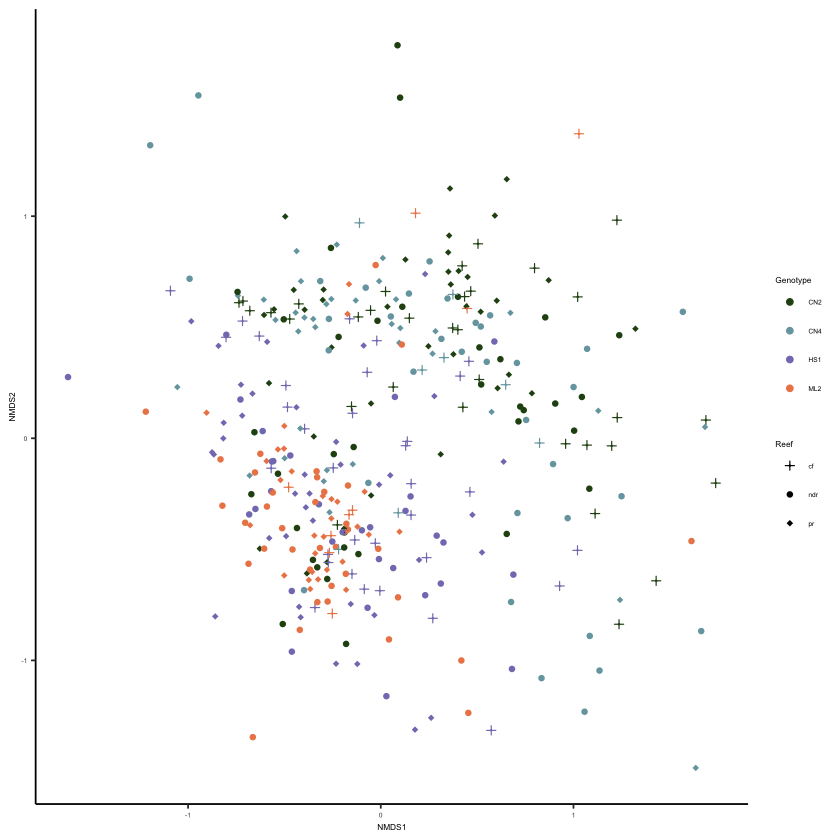

In [76]:
fig_ord_bray = plot_ordination(ps_ra, psr_ra_ord,
                               color="Genotype",
                              shape="reef",
                            axes = c(1,2)) +
geom_point(size = .01) +
scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) 
fig_ord_bray
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/ord_bray.png", width = 4, height = 4, units = "in", dpi=300)     

In [11]:
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 

[1] 363   1

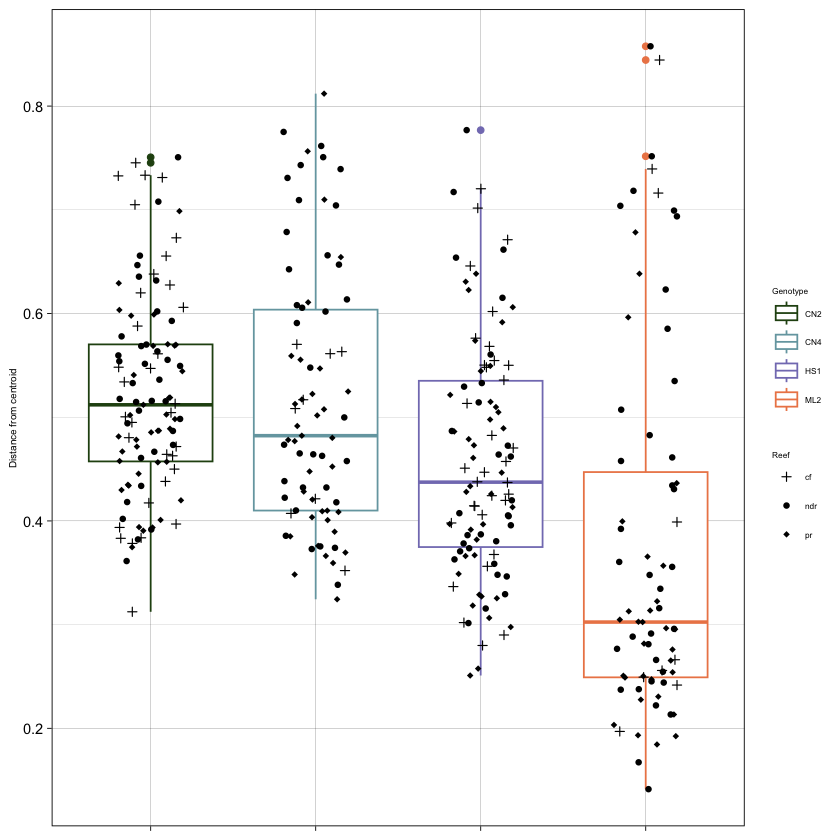

In [110]:
fig_dis = ggplot(mod_dist_geno_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=Genotype)) +
geom_jitter(aes(shape = reef), height = 0, width = .2) +
scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_linedraw() +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
#theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.title.x = element_blank()) +
theme(axis.text.x = element_blank()) +
ylab("Distance from centroid")

fig_dis

In [48]:
ps_fill_alpha= filter_taxa(ps_fill_euk, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_fill_alpha

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27459 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27459 taxa by 7 taxonomic ranks ]

In [49]:
(ps_fill_rare <- phyloseq::rarefy_even_depth(ps_fill_alpha, rngseed = 123, replace = FALSE, sample.size=2500))             

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

2 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


bagnumber-1759bagnumber-1896

...

11075OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 16384 taxa and 361 samples ]
sample_data() Sample Data:       [ 361 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 16384 taxa by 7 taxonomic ranks ]

In [50]:
adiv <- data.frame(
  "Shannon" = phyloseq::estimate_richness(ps_fill_rare, measures = "Shannon")) %>% rownames_to_column("sample_bag")
head(adiv)

,sample_bag,Shannon
,<chr>,<dbl>
1,bagnumber-1009,1.772885
2,bagnumber-1010,1.574296
3,bagnumber-1011,2.175282
4,bagnumber-1013,2.842471
5,bagnumber-1014,5.777263
6,bagnumber-1015,1.717165


In [51]:
ps_ra_meta= as(sample_data(ps_fill_rare), "data.frame")
#ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
 #               "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.")

In [52]:
adiv_trans =adiv %>%
mutate(Shannon_trans = log10(Shannon))
head(adiv_trans)

,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>
1,bagnumber-1009,1.772885,0.2486805
2,bagnumber-1010,1.574296,0.1970863
3,bagnumber-1011,2.175282,0.3375156
4,bagnumber-1013,2.842471,0.4536960
5,bagnumber-1014,5.777263,0.7617221
6,bagnumber-1015,1.717165,0.2348121


In [53]:
alpha_all=cbind(ps_ra_meta, adiv_trans)
dim(alpha_all)
head(alpha_all, n=2)

[1] 361  57

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,bagnumber-1009,1.772885,0.2486805
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,bagnumber-1010,1.574296,0.1970863


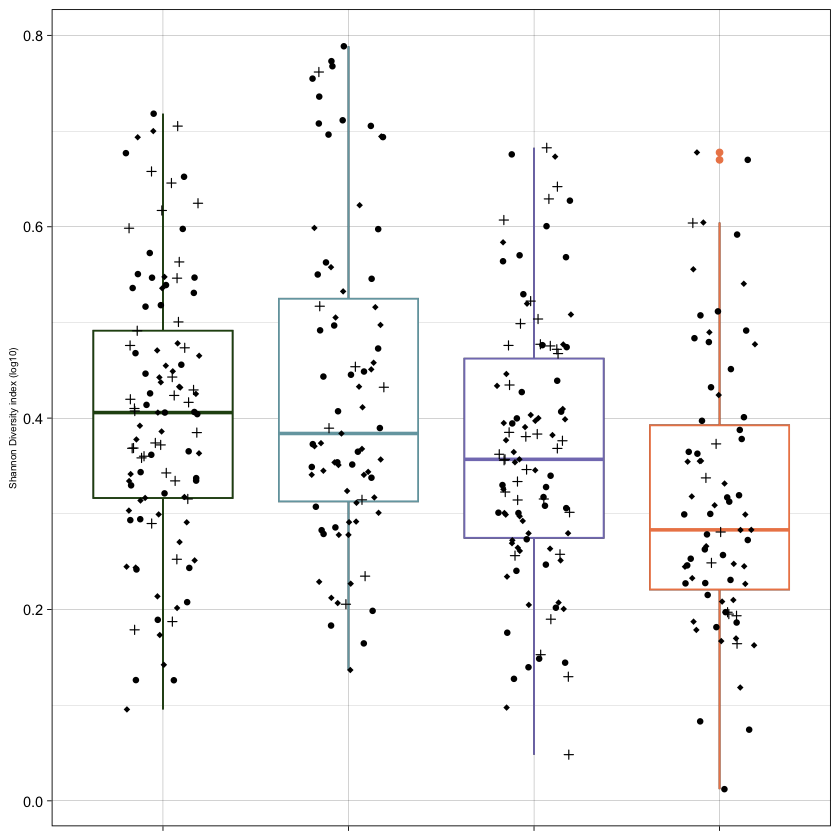

In [116]:
fig_alpha = alpha_all %>%
 ggplot(aes(x = Genotype, y = Shannon_trans))  +
  geom_boxplot(outlier.color = NA)  +
geom_boxplot(aes(color=Genotype)) +
geom_jitter(aes(shape = reef), height = 0, width = .2) +
scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_linedraw() +
#theme(legend.text =element_text(size=5)) +
#theme(legend.title = element_text(size=5)) +
#theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.title.x = element_blank()) +
theme(axis.text.x = element_blank()) +
theme(legend.position="none") +
ylab("Shannon Diversity index (log10)")
fig_alpha

In [63]:
sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "genus") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


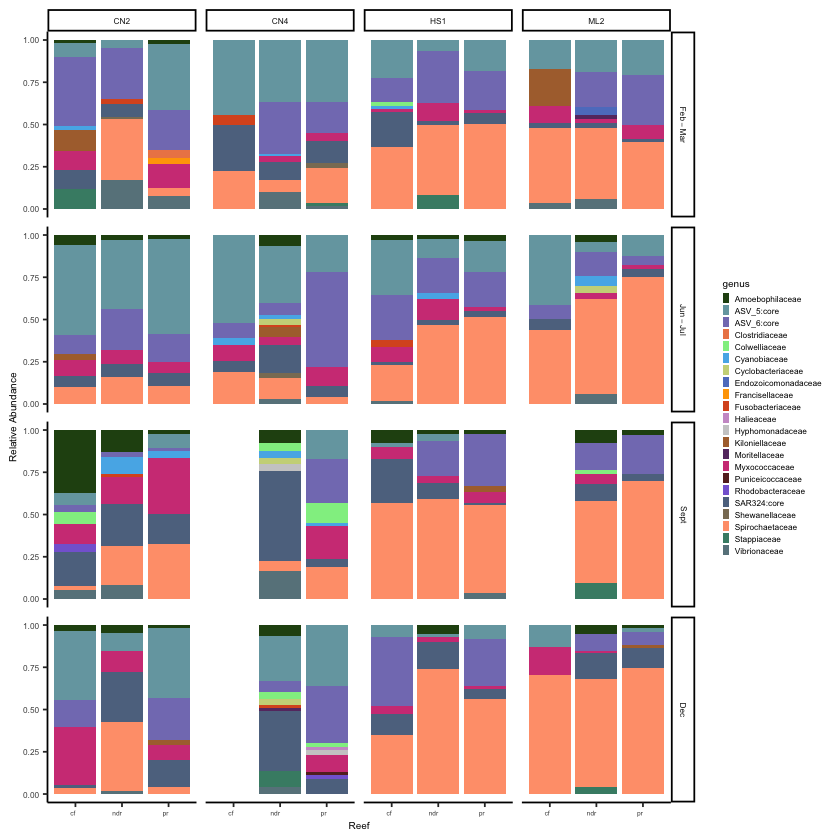

In [100]:
supp.labs <- as_labeller(c(Trip_2="Feb-Mar", Trip_3="Jun-Jul", Trip_4="Sept", Trip_5="Dec"),
                           default = label_parsed)
fig_ra= sum_ps %>%
filter(Abundance>=0.1) %>%
ggplot(aes(x =reef, y=Abundance, fill=genus)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = family)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
facet_grid(Samp_trip~Genotype, space="free", labeller = labeller(Samp_trip= supp.labs)) +
scale_fill_manual(values=c("#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 0, hjust = 1, size=8)) +
ylab("Relative Abundance") +
xlab("Reef") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =5)) +
theme(strip.text.x = element_text(size =5)) +
theme(strip.text.y = element_text(size =5)) 
fig_ra

In [113]:
comboAB= ggpubr::ggarrange(fig_dis, fig_ord_bray,
                  common.legend = TRUE, nrow=1,
                labels = c("A.", "B."), font.label = list(size = 9))

In [114]:
comboBC= ggpubr::ggarrange(fig_alpha, fig_ra,
                  common.legend = FALSE, nrow=1,
                labels = c("C.", "D."), font.label = list(size = 9))

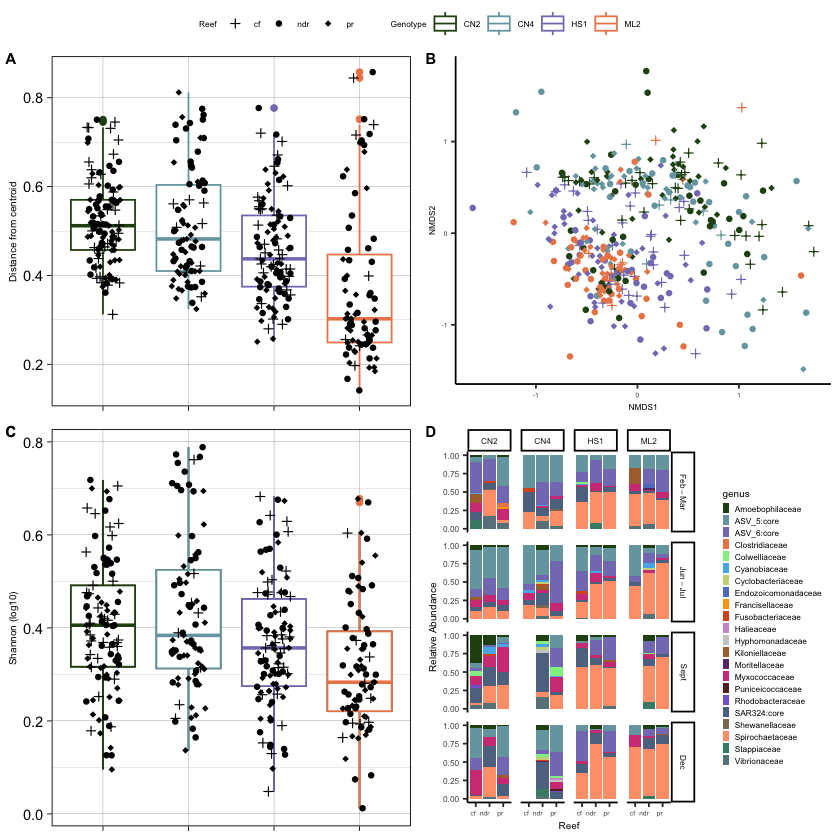

In [120]:

ggpubr::ggarrange(comboAB, comboBC,
                  common.legend = FALSE, nrow=2,
                labels = c("", "C"), font.label = list(size = 9))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/fig2.png", 
      width = 6.5, height = 6, units = "in", dpi=300)

In [234]:
ps_ra_ad =  subset_samples(ps_ra, cluster_depth!= "NA")

In [235]:
#cca ordination
cca_ps <- ordinate(
  physeq = ps_ra_ad, 
  method = "CCA",
 distance = bray,
  formula =   ~  N.N.uM. +
cluster_depth + Speed.cm.s. + Si.uM. + PO4.uM. + avgSST_degC)

In [252]:
arrowdf %>%
mutate(across('labels', str_replace, "avgSST_degC" , "Temperature")) %>%
mutate(across('labels', str_replace, "cluster_depth" , "Depth")) %>%
mutate(across('labels', str_replace, "Si.uM." , "Si μM")) %>%
mutate(across('labels', str_replace, 'N.N.uM.' , "N2 μM")) %>%
mutate(across('labels', str_replace, 'PO4.uM.' , "PO4 μM"))

,labels,CCA1,CCA2
,<chr>,<dbl>,<dbl>
N.N.uM.,N2μM,0.37168395,0.5013898
cluster_depth,Depth,-0.89076985,0.1091940
Speed.cm.s.,Current speed cm/s,-0.15807423,-0.1145339
Si.uM.,SiμM,0.19537126,-0.5303111
PO4.uM.,PO4μM,0.08544711,0.2257819
avgSST_degC,Temperature,0.02034086,0.7510653


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'N2 μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'N2 μM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Si μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Si μM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'PO4 μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'PO4 μM' in 'mbcsToSbcs': dot substituted for <bc>”


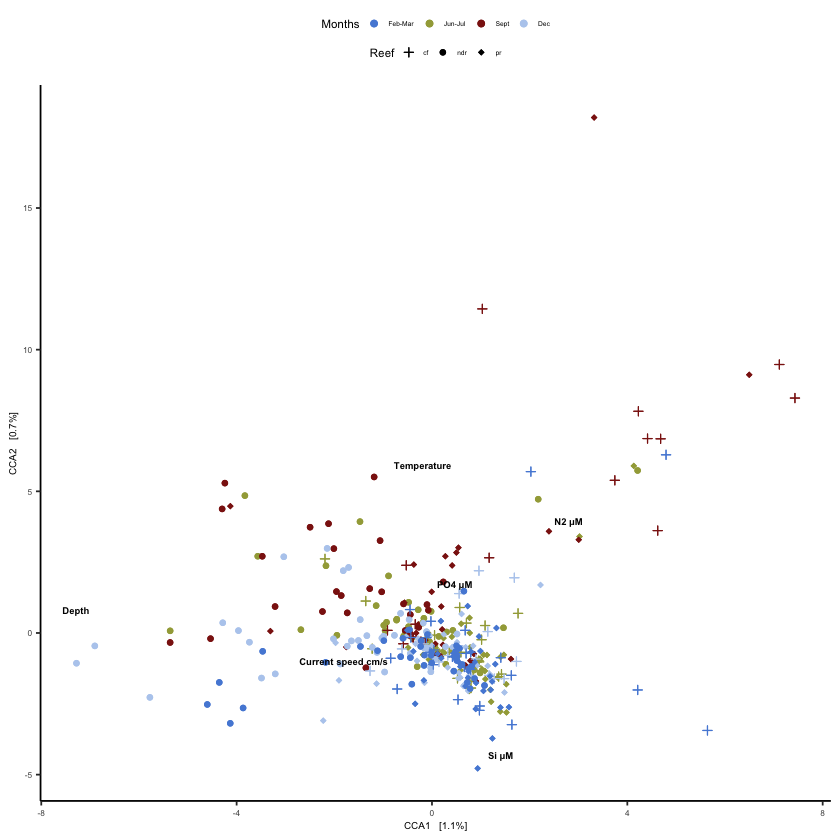

In [305]:
lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Dec")
p0 = plot_ordination(ps_ra_ad, cca_ps, color = "Samp_trip", shape ="reef") +
geom_point() +
scale_color_manual("Months", values=c("#558bd9", "#a3a847", "#8c1c13", "#b6cdee"), , labels= lab1)
# Now add the environmental variables as arrows
arrowmat = vegan::scores(cca_ps, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat) %>%
mutate(across('labels', str_replace, "avgSST_degC" , "Temperature")) %>%
mutate(across('labels', str_replace, "cluster_depth" , "Depth"))  %>%
mutate(across('labels', str_replace, "Speed.cm.s." , "Current speed cm/s"))  %>%
mutate(across('labels', str_replace, "Si.uM." , "Si μM")) %>%
mutate(across('labels', str_replace, 'N.N.uM.' , "N2 μM")) %>%
mutate(across('labels', str_replace, 'PO4.uM.' , "PO4 μM"))
# Define the arrow aesthetic mapping
arrow_map = aes(xend = CCA1, yend = CCA2, x = 0, y = 0, shape = NULL, color = NULL, 
    label = labels)
label_map = aes(x = 8 * CCA1, y = 8 * CCA2, shape = NULL, color = NULL, 
    label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(1,"cm"))
p1 = p0 +
#geom_segment(arrow_map, size = 0.3, data = arrowdf, color = "black", 
 #   arrow = arrowhead) + 

geom_text(label_map, size = 2, data = arrowdf ,fontface = "bold", hjust=0.8, vjust=0.8, angle=0) +
theme_classic() +
scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
theme(legend.text =element_text(size=5)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(legend.text =element_text(size=4)) +
#theme(legend.title = element_text(size=7)) +
 # coord_fixed() +
theme(legend.title= element_text(size=7),
      legend.margin = margin(0, 0, 0, 0),
      legend.spacing.x = unit(0, "mm"),
      legend.spacing.y = unit(0, "mm"),
     legend.position="top", legend.box = "vertical")

p1
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/ord_env.png", 
      width = 8, height = 4, units = "in", dpi=300)

In [166]:
library("ggcorrplot")

In [214]:
meta_envs= meta %>%
filter(cluster_depth!= "NA") %>%
select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "cluster_depth","avgchla_mgm.3") %>%
rename('Speed.cm.s.' = "Current") %>%
rename('NO2.uM.' = "NO2μM") %>%
rename('N.N.uM.' = "N2μM")  %>%
rename('NO3.uM.' = "NO3μM") %>%
rename('PO4.uM.' = "PO4μM") %>%
rename('Si.uM.' = "SiμM") %>%
rename('avgSST_degC' = "Temp") %>%
rename('cluster_depth' = "Depth") %>%
rename('avgchla_mgm.3' = "Chla")

head(meta_envs)

,Genotype,Samp_trip,reef,Current,NO2μM,N2μM,NO3μM,PO4μM,SiμM,Temp,Depth,Chla
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-638,HS1,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,-18.7,0.3999531
bagnumber-639,HS1,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,-18.7,0.3999531
bagnumber-640,HS1,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,-18.7,0.3999531
bagnumber-734,ML2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,-18.7,0.3999531
bagnumber-736,ML2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,-18.7,0.3999531
bagnumber-735,ML2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,-18.7,0.3999531


In [218]:
corr <- round(cor(meta_envs[4:12]),1)
head(corr)

,Current,NO2μM,N2μM,NO3μM,PO4μM,SiμM,Temp,Depth,Chla
Current,1.0,-0.5,-0.5,-0.5,0.2,0.6,0.1,0.0,-0.1
NO2μM,-0.5,1.0,0.6,0.6,0.2,-0.4,0.7,0.2,0.3
N2μM,-0.5,0.6,1.0,1.0,-0.2,-0.3,0.6,0.0,0.1
NO3μM,-0.5,0.6,1.0,1.0,-0.2,-0.3,0.6,0.0,0.1
PO4μM,0.2,0.2,-0.2,-0.2,1.0,0.4,0.1,-0.2,-0.3
SiμM,0.6,-0.4,-0.3,-0.3,0.4,1.0,-0.1,-0.3,-0.4


In [219]:
# Compute a matrix of correlation p-values
p.mat <- cor_pmat(meta_envs[4:12])
head(p.mat[, 1:9])

,Current,NO2μM,N2μM,NO3μM,PO4μM,SiμM,Temp,Depth,Chla
Current,0.000000e+00,3.742661e-27,2.026530e-27,3.830614e-27,1.758682e-05,1.899854e-33,1.201515e-01,8.067153e-01,2.732239e-02
NO2μM,3.742661e-27,0.000000e+00,3.651051e-37,5.518612e-36,1.032196e-04,8.073802e-16,3.133374e-50,1.499600e-03,8.509235e-11
N2μM,2.026530e-27,3.651051e-37,0.000000e+00,0.000000e+00,3.004497e-06,2.869573e-07,4.064679e-36,7.955656e-01,8.540992e-02
NO3μM,3.830614e-27,5.518612e-36,0.000000e+00,0.000000e+00,1.868407e-06,4.056235e-07,1.693510e-35,7.669027e-01,9.840424e-02
PO4μM,1.758682e-05,1.032196e-04,3.004497e-06,1.868407e-06,0.000000e+00,6.321373e-14,1.822751e-02,3.091993e-04,1.302627e-09
SiμM,1.899854e-33,8.073802e-16,2.869573e-07,4.056235e-07,6.321373e-14,0.000000e+00,3.051057e-01,2.912381e-07,1.071571e-12


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'PO4μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'PO4μM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'SiμM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'SiμM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'N2μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'N2μM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label)

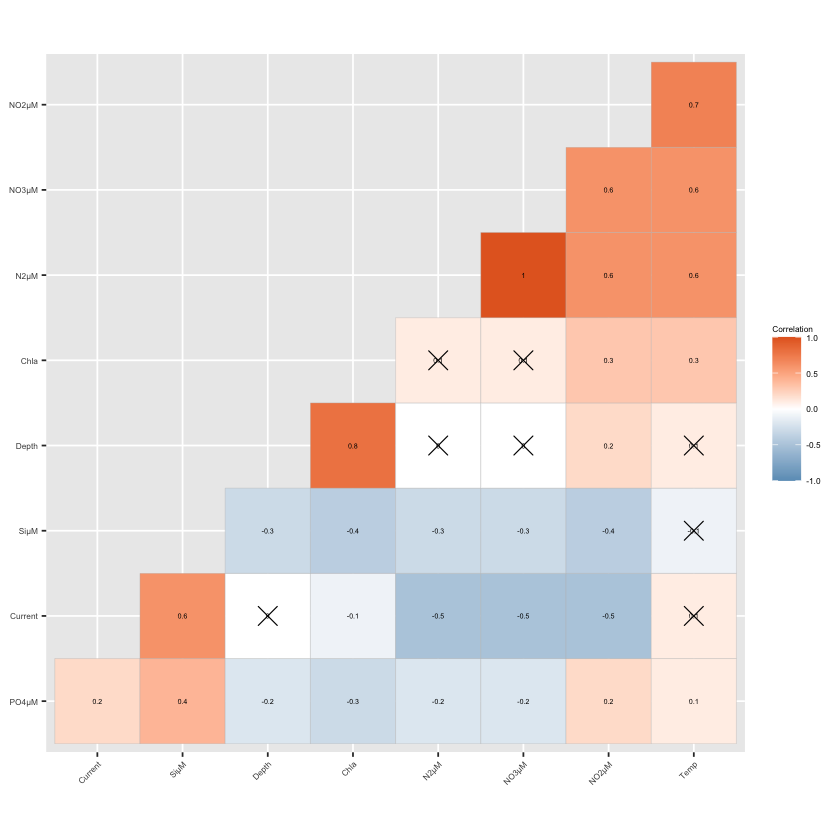

In [297]:
fig_cor = ggcorrplot(corr, 
            hc.order = TRUE,
    type = "lower", p.mat = p.mat,  lab = TRUE,
          legend.title = "Correlation",
          colors = c("#6D9EC1", "white", "#E46726"),
           lab_size = 1.5,
                    ggtheme = ggplot2::theme_gray) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
guides(color = guide_legend(keywidth = 0.1, , keyheight =.10))

fig_cor

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'PO4μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'PO4μM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'SiμM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'SiμM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'N2μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'N2μM' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label)

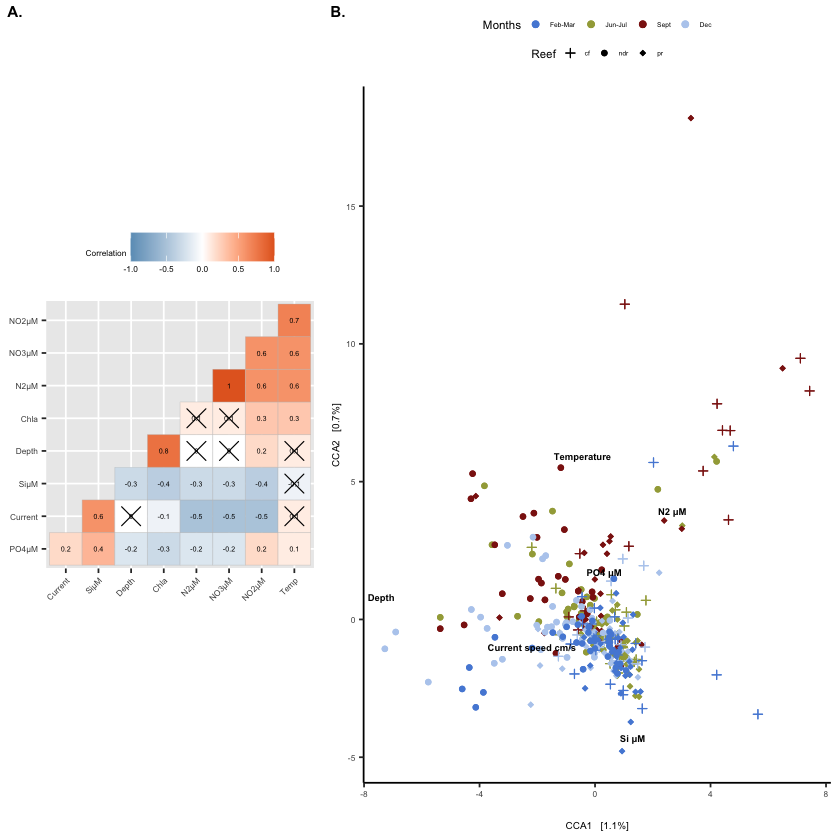

In [325]:
ggpubr::ggarrange(fig_cor, p1,
                  common.legend = FALSE, nrow=1,
                labels = c("A.", "B."), font.label = list(size = 9),
                widths = c(1, 1.6), align="h", legend="top", heights=c(3,1))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/fig3.png", 
      width = 6, height = 4, units = "in", dpi=300)

In [350]:
ps_ra_meta= as(sample_data(ps_fill_rare), "data.frame")
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3", "cluster_depth")
alpha_envs=cbind(ps_ra_meta_envs, adiv_trans) %>%
rename('Speed.cm.s.' = "Current") %>%
rename('NO2.uM.' = "NO2μM") %>%
rename('N.N.uM.' = "N2μM")  %>%
rename('NO3.uM.' = "NO3μM") %>%
rename('PO4.uM.' = "PO4μM") %>%
rename('Si.uM.' = "SiμM") %>%
rename('avgSST_degC' = "Temp") %>%
rename('cluster_depth' = "Depth") %>%
rename('avgchla_mgm.3' = "Chla")

In [354]:
y_columns <- names(alpha_envs[4:12])
y_columns

[1] "Current" "NO2μM"   "N2μM"    "NO3μM"   "PO4μM"   "SiμM"    "Temp"   
[8] "Chla"    "Depth"

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'NO2μM' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'NO2μM' in 'mbcsToSbcs': dot substituted for <bc>”
Wa

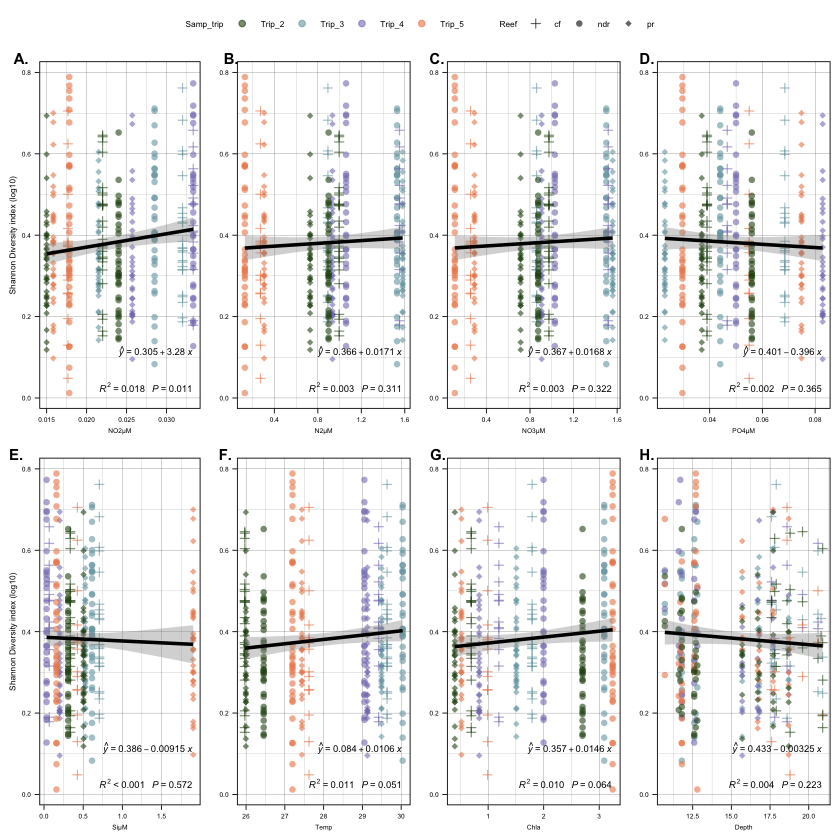

In [416]:
library(ggplot2)
library(ggpubr)
library(cowplot)

# Create an empty list to store the plots
plots <- list()

# Create a shared plot with geom_smooth and geom_point
shared_plot <- alpha_envs %>%
  ggplot(aes(x = .data[[y_columns[1]]], y = Shannon_trans, color = Samp_trip), size=0.5) +
  geom_point(aes(color = Samp_trip, shape = reef), alpha = .6) +
  theme_bw() +
  geom_smooth(method = 'lm', color = 'black') +
  stat_poly_eq(
    formula = y ~ x,
    eq.with.lhs = "italic(hat(y))~`=`~",
    aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
    parse = TRUE,
    label.y = "bottom",
    label.x = "right",
    color = "black",
    rr.digits = 3,
    size = 2
  ) +
  stat_poly_eq(
    aes(label = paste(..eq.label.., sep = "~~~")),
    label.y = 0.15,
    eq.with.lhs = "italic(hat(y))~`=`~",
    eq.x.rhs = "~italic(x)",
    formula = y ~ x,
    parse = TRUE,
    size = 2,
    label.x = "right",
    color = "black"
  ) +
  scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
  scale_color_manual(values = c("#274e13", "#76a5af", "#837dbe", "#ed8655")) +
  theme_linedraw() +
  theme(legend.text = element_text(size = 5)) +
  theme(legend.title = element_text(size = 5)) +
  theme(axis.title.x = element_text(size = 4)) +
  theme(axis.text.x = element_text(size = 4)) +
  theme(axis.text.y = element_text(size = 4)) +
  theme(axis.title.y = element_text(size = 5))

# Loop through each y variable (starting from the second one) and create a plot
for (i in 1:length(y_columns[-1])) {
  y_var <- y_columns[-1][i]
  
  plot <- shared_plot +
    aes(x = .data[[y_var]]) +  # Modify the x-axis variable
    theme(plot.margin = margin(0.3, 0.2, 0.2, 0.2, "cm"))  # Reduce plot margin to avoid clipping
  
  # Remove legend for individual plots
  plot <- plot + theme(legend.position = "none")
  
  # Remove y-axis title for specified figures
  if (i %in% c(2, 3, 4, 6, 7, 8)) {
    plot <- plot + theme(axis.title.y = element_blank())
  }
  
  # Add the plot to the list
  plots[[y_var]] <- plot
  
  # Modify ylab for figures "A" and "E"
  if (i %in% c(1, 5)) {
    plots[[y_var]] <- plots[[y_var]] + ylab("Shannon Diversity index (log10)")
  }
}

# Arrange plots using ggarange
combined_plot <- ggpubr::ggarrange(plotlist = plots, ncol = 4, nrow = 2, common.legend = TRUE,
                labels = c(" A.", " B.", "C. ", "D. ", "E. ", "F. ", "G. ", "H. "), font.label = list(size = 9),
               legend="top")

# Print the combined plot
print(combined_plot)


In [418]:


combined_plot <- ggpubr::ggarrange(plotlist = plots, ncol = 4, nrow=2, common.legend = TRUE,
                labels = c(" A.", " B.", "C. ", "D. ", "E. ", "F. ", "G. ", "H. "), font.label = list(size = 8),
               legend="top")
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/fig4.png", 
      width = 5, height = 4, units = "in", dpi=300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
